In [4]:
#global params.

#game title. full list of games = http://yavar.naddaf.name/ale/list_of_current_games.html
GAME="ms_pacman"

#game image will be resized from (210,160) to your image_size. 
#You may want a bigger image for your homework assignment IF you want a larger NN
IMAGE_W,IMAGE_H = IMAGE_SIZE =(105,80)

#number of parallel agents and batch sequence length (frames)
N_AGENTS = 10
SEQ_LENGTH = 5

In [5]:
from __future__ import print_function 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%env THEANO_FLAGS="floatX=float32"

env: THEANO_FLAGS="floatX=float32"


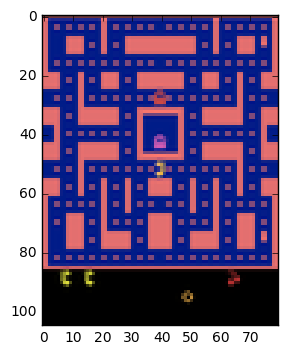

In [6]:
from env import Atari

#creating a game
atari = Atari(GAME,image_size=IMAGE_SIZE) 

action_names = np.array(atari.get_action_meanings())

obs = atari.step(0)[0]

plt.imshow(obs,interpolation='none')

In [7]:
import gym
from gym import make
atari = gym.make(GAME_TITLE)
atari.reset()
plt.imshow(atari.render('rgb_array'))

NameError: name 'GAME_TITLE' is not defined

In [8]:
import lasagne
from lasagne.layers import InputLayer, DimshuffleLayer

#image observation at current tick goes here, shape = (sample_i,x,y,color)
observation_layer = InputLayer((None,IMAGE_W,IMAGE_H,3))

#reshape to [sample, color, x, y] to allow for convolutional layers to work correctly
observation_reshape = DimshuffleLayer(observation_layer,(0,3,1,2))

In [9]:
from lasagne.layers import Conv2DLayer,Pool2DLayer,DenseLayer,batch_norm,dropout

#main neural network body
conv0 = Conv2DLayer(observation_reshape,16,filter_size=(8,8),stride=(4,4),name='conv0')

conv1 = Conv2DLayer(batch_norm(conv0),32,filter_size=(4,4),stride=(2,2),name='conv1')

conv2 = Conv2DLayer(batch_norm(conv1),64,filter_size=(4,4),stride=(2,2),name='conv2')

dense0 = DenseLayer(batch_norm(conv2),256,name='dense',nonlinearity = lasagne.nonlinearities.tanh)

#please set this to your last layer for convenience
last_layer = dense0

In [10]:
#a layer that predicts Qvalues
qvalues_layer = DenseLayer(last_layer,
                   num_units = atari.action_space.n,
                   nonlinearity=lasagne.nonlinearities.linear,
                   name="q-evaluator layer")

#To pick actions, we use an epsilon-greedy resolver (epsilon is a property)
from agentnet.resolver import EpsilonGreedyResolver
action_layer = EpsilonGreedyResolver(qvalues_layer,name="e-greedy action picker")

action_layer.epsilon.set_value(np.float32(0.1))

In [11]:
from agentnet.agent import Agent
#all together
agent = Agent(observation_layers=observation_layer,
              policy_estimators=qvalues_layer,
              action_layers=action_layer)

In [12]:
#Since it's a single lasagne network, one can get it's weights, output, etc
weights = lasagne.layers.get_all_params(action_layer,trainable=True)
weights

[conv0.W,
 conv0_bn.beta,
 conv0_bn.gamma,
 conv1.W,
 conv1_bn.beta,
 conv1_bn.gamma,
 conv2.W,
 conv2_bn.beta,
 conv2_bn.gamma,
 dense.W,
 dense.b,
 q-evaluator layer.W,
 q-evaluator layer.b]

In [14]:
from pool import AtariGamePool

pool = AtariGamePool(agent,GAME, N_AGENTS,image_size=IMAGE_SIZE,max_size=10000)



ERROR (theano.gof.opt): Optimization failure due to: LocalOptGroup(local_abstractconv_gemm,local_abstractconv_gradweight_gemm,local_abstractconv_gradinputs_gemm,local_abstractconv3d_gemm,local_abstractconv3d_gradweight_gemm,local_abstractconv3d_gradinputs_gemm,local_conv2d_cpu,local_conv2d_gradweight_cpu,local_conv2d_gradinputs_cpu,local_conv3d_cpu,local_conv3d_gradweight_cpu,local_conv3d_gradinputs_cpu)
[2016-10-27 22:12:02,368] Optimization failure due to: LocalOptGroup(local_abstractconv_gemm,local_abstractconv_gradweight_gemm,local_abstractconv_gradinputs_gemm,local_abstractconv3d_gemm,local_abstractconv3d_gradweight_gemm,local_abstractconv3d_gradinputs_gemm,local_conv2d_cpu,local_conv2d_gradweight_cpu,local_conv2d_gradinputs_cpu,local_conv3d_cpu,local_conv3d_gradweight_cpu,local_conv3d_gradinputs_cpu)
ERROR (theano.gof.opt): node: AbstractConv2d{convdim=2, border_mode='valid', subsample=(2, 2), filter_flip=True, imshp=(None, 32, 11, 8), kshp=(64, 32, 4, 4), filter_dilation=(1, 1)}

AssertionError: AbstractConv2d Theano optimization failed: there is no implementation available supporting the requested options. Did you exclude both "conv_dnn" and "conv_gemm" from the optimizer? If on GPU, is cuDNN available and does the GPU support it? If on CPU, do you have a BLAS library installed Theano can link against?

In [15]:
pool

NameError: name 'pool' is not defined

In [16]:
import theano

In [17]:
print(theano.config)

IndexError: list index out of range